In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import sklearn.datasets
from sklearn.metrics import classification_report

def load_iris():
    return sklearn.datasets.load_iris()['data'].T, sklearn.datasets.load_iris()['target']

DIris, LIris = load_iris()
D = DIris[:, LIris != 0]
L = LIris[LIris != 0]
D
D.shape

(4, 100)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


IndexError: index 2 is out of bounds for axis 0 with size 2

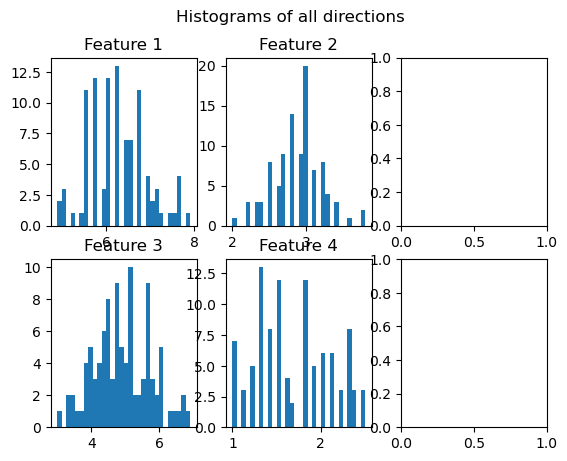

In [5]:
def calc_SB_SW(D, L):
    NL = np.unique(L)
    print(L)
    U = D.mean(1, keepdims=True)
    UC = []
    NC = []

    for l in L:
        UC.append(D[:, (L == l)].mean(1))
        NC.append(np.count_nonzero(L == l))

    UC = np.array(UC).T

    SBsum = 0
    for i, l in enumerate(NL):
        SBsum += NC[i] * (UC[:, [i]] - U) @ (UC[:, [i]] - U).T

    SB = SBsum/D.shape[1]

    D_by_class = [D[:, (L == l)] for i, l in enumerate(NL)]
    SWsum = 0

    for i, l in enumerate(NL):
        SWsum += (D_by_class[i] - UC[:, [i]]) @ (D_by_class[i] - UC[:, [i]]).T

    SW = SWsum/D.shape[1]
    
    return (SB, SW)
SB, SW = calc_SB_SW(D, L)
def compute_lda_JointDiag(D, L, m):

    Sb, Sw = calc_SB_SW(D, L)

    U, s, _ = np.linalg.svd(Sw)
    P = U @ np.diag(1.0/(s**0.5)) @ U.T

    Sb2 = P @ Sb @ P.T
    U2, s2, _ = np.linalg.svd(Sb2)

    P2 = U2[:, 0:m]
    return P.T @ P2

def plot_hist_all_directions(D):
    fig, axs = plt.subplots(2, 3)
    fig.suptitle('Histograms of all directions')
    for i in range(6):
        axs[i//2, i%2].hist(D[i, :], bins=30)
        axs[i//2, i%2].set_title(f'Feature {i+1}')
    plt.show()

plot_hist_all_directions(D)
